# Summary 1

To sum up all we have done so far, the code below should be very familar.
<br>
I have added in iShares US Core Bonds data under the ticker AGG, under the Market Data section so that we can see how our portfolio performed relative to both the equities and the bonds market.

In [6]:
# Summing up all we have done so far

import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats

# Assets
n = int(input('Please input the number of tickers you want to look at: '))
tickers = []
for i in range(0, n):
    ticker = input(f'Please input ticker {i+1}: ')
    tickers.append(ticker.upper())
print('The tickers you are have chosen are: ', tickers)

# Timeframe
start = '2018-07-01'
end = '2021-07-01'

# Portfolio Returns Data
portfolio = pd.DataFrame()
portfolio_returns = pd.DataFrame()
for ticker in tickers:
    portfolio[ticker] = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
    portfolio_returns[f'{ticker} Returns'] = np.log((portfolio[ticker])).pct_change()

# Market Returns
sp500_returns = (np.log(pdr.DataReader('^GSPC', 'yahoo', start, end)['Adj Close'])).pct_change()
bonds_returns = (np.log(pdr.DataReader('AGG', 'yahoo', start, end)['Adj Close'])).pct_change()

# Sharpe Ratio
sharpe_ratio = pd.DataFrame()
for ticker in tickers:
    sharpe_ratio[ticker] = (portfolio_returns[f'{ticker} Returns'] - sp500_returns) / portfolio_returns[f'{ticker} Returns'].std()
    
# Drawdowns 
drawdown_dataframe = pd.DataFrame()
for ticker in tickers:
    wealth_index = (1 + portfolio_returns[f'{ticker} Returns']).cumprod()
    previous_peak = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peak) / previous_peak
    drawdown_dataframe[f'{ticker} Wealth'] = wealth_index
    drawdown_dataframe[f'{ticker} Peaks'] = previous_peak
    drawdown_dataframe[f'{ticker} Drawdowns'] = drawdowns

# Skewness
def skew(returns):
    demeaned_returns = returns - returns.mean()
    sigma = returns.std(ddof=0)
    exponential = (demeaned_returns**3).mean()
    return exponential/sigma**3

#Kurtosis
def kurt(returns, fisher=True):
    demeaned_returns = returns - returns.mean()
    sigma = returns.std(ddof=0)
    exponential = (demeaned_returns**4).mean()
    if fisher==True:
        return exponential/sigma**4 - 3
    else:
        return exponential/sigma**4
    
# Jarque-Bera Normality Test
def jarque_bera_test(returns):
    return len(returns) * ((skew(returns)**2) + (kurt(returns)**2 / 4)) / 6
    
# Summary Statistics
summary = pd.DataFrame({
    'Mean': portfolio_returns.mean(),
    'Median': portfolio_returns.median(),
    'Minimum': portfolio_returns.min(),
    'Maximum': portfolio_returns.max(),
    'Volatility': portfolio_returns.std(),
    'Observations': len(portfolio_returns),
    'Skewness': (skew(portfolio_returns)).round(5),
    'Excess Kurtosis': (kurt(portfolio_returns, fisher=True)).round(5),
    'Jarque-Bera': (jarque_bera_test(portfolio_returns)).round(5),
    'P-Value': (scipy.stats.distributions.chi2.pdf(jarque_bera_test(portfolio_returns), 2)).round(5)
})

pf_average = portfolio_returns.mean(axis=1)
pf_av_df = {
    'Mean': pf_average.mean(),
    'Median': pf_average.median(),
    'Minimum': pf_average.min(),
    'Maximum': pf_average.max(),
    'Volatility': pf_average.std(),
    'Observations': len(pf_average),
    'Skewness': (skew(pf_average)),
    'Excess Kurtosis': (kurt(pf_average, fisher=True)),
    'Jarque-Bera': (jarque_bera_test(pf_average)),
    'P-Value': (scipy.stats.distributions.chi2.pdf(jarque_bera_test(pf_average), 2))
}

summary.loc['Portfolio Average Returns'] = pf_av_df

# Displaying our summary statistics
summary

Please input the number of tickers you want to look at:  4
Please input ticker 1:  c
Please input ticker 2:  gm
Please input ticker 3:  wmt
Please input ticker 4:  jnj


The tickers you are have chosen are:  ['C', 'GM', 'WMT', 'JNJ']


,Mean,Median,Minimum,Maximum,Volatility,Observations,Skewness,Excess Kurtosis,Jarque-Bera,P-Value
C Returns,0.000074,0.000193,-0.055410,0.044647,0.007241,756,-0.47580,12.52191,4967.665270,0.0
GM Returns,0.000199,0.000134,-0.063165,0.063408,0.008194,756,-0.28686,13.24815,5539.042240,0.0
WMT Returns,0.000165,0.000059,-0.020182,0.023851,0.003096,756,1.09545,13.88931,6227.960040,0.0
JNJ Returns,0.000110,0.000172,-0.021515,0.016136,0.002968,756,-0.57536,10.58451,3570.711200,0.0
Portfolio Average Returns,0.000137,0.000259,-0.032886,0.029847,0.004219,756,-0.57044,15.02001,7147.423043,0.0



Assets in the Portfolio:
 C GM WMT JNJ 



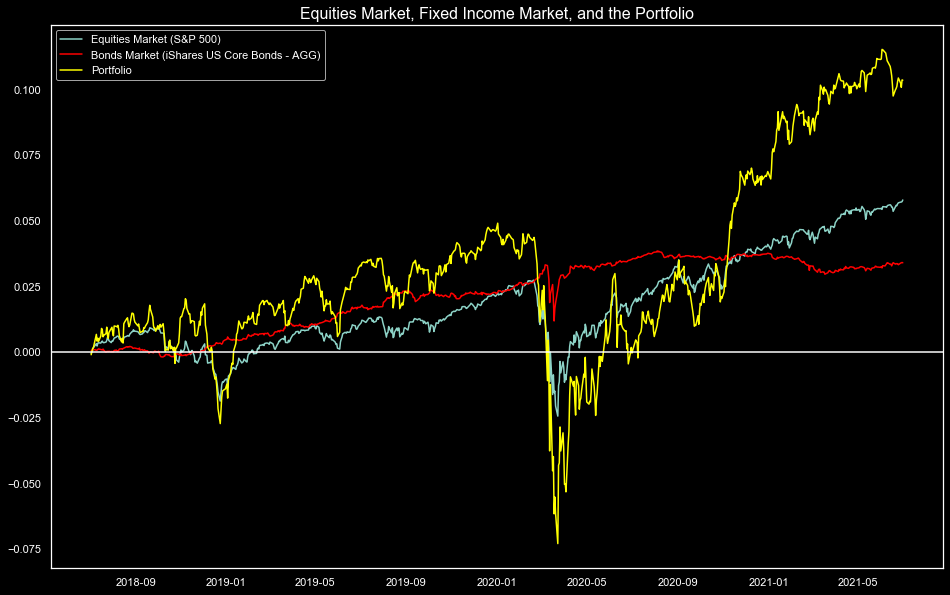

In [19]:
print('\nAssets in the Portfolio:\n', *tickers, '\n')
# The consistent use of \n is for 'new line' in the print function.

# Plotting our portfolio against the bonds and equities market
with plt.style.context('dark_background'):
    plt.figure(figsize=(16,10))
    plt.plot(sp500_returns.cumsum(), label='Equities Market (S&P 500)')
    plt.plot(bonds_returns.cumsum(), color='red', label='Bonds Market (iShares US Core Bonds - AGG)')
    plt.plot(pf_average.cumsum(), color='yellow', label='Portfolio')
    plt.axhline(y=0)
    plt.legend()
    plt.title('Equities Market, Fixed Income Market, and the Portfolio', fontsize=16)
    plt.grid(False)
    plt.show();

Now that we have a very rough sketch of our portfolio, we should tidy this up by putting all this into a package.

We will first create a text file and we will name it:

**PortfolioAnalysis1.py**

It is important we change the **.txt** at the end into **.py** so that Python knows that we are writing a Python script.

We first copy and paste the following code into the PortfolioAnalysis1.py file:

In [20]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats

# Assets
n = int(input('Please input the number of tickers you want to look at: '))
tickers = []
for i in range(0, n):
    ticker = input(f'Please input ticker {i+1}: ')
    tickers.append(ticker.upper())
print('The tickers you are have chosen are: ', tickers)

Please input the number of tickers you want to look at:  4
Please input ticker 1:  tsla
Please input ticker 2:  jpm
Please input ticker 3:  c
Please input ticker 4:  gm


The tickers you are have chosen are:  ['TSLA', 'JPM', 'C', 'GM']


Now when we run the 'Assets' code block, we are immediately asked to enter in our assets.
<br>
Let's change that:

In [27]:
def get_tickers(n):

    tickers = []
    for i in range(0, n):
        ticker = input(f'Please input ticker {i+1}: ')
        tickers.append(ticker.upper())
    
    return tickers

Now we have a function that we can call and it will return a list of tickers to us. 
<br>
When we return the ticker, it will display the tickers so there is no need have the print() function at at the end.

We can also input the number as a parameter within the parenthesis.

In [30]:
tickers = get_tickers(n=4)
tickers

Please input ticker 1:  tsla
Please input ticker 2:  aapl
Please input ticker 3:  jnj
Please input ticker 4:  gm


['TSLA', 'AAPL', 'JNJ', 'GM']

Now we'll move on to doing the same for the data of these assets:

In [32]:
def get_data(tickers, start='2018-07-01', end='2021-07-01'):

    # Portfolio Returns Data
    portfolio = pd.DataFrame()
    portfolio_returns = pd.DataFrame()
    for ticker in tickers:
        portfolio[ticker] = pdr.DataReader(ticker, 'yahoo', start, end)['Adj Close']
        portfolio_returns[f'{ticker} Returns'] = np.log((portfolio[ticker])).pct_change()
        
    return portfolio_returns

Now we can also combine the start and end date into getting our data.
<br>
By specifying it in the parameter, we do not need to enter it into that parenthesis again as those dates will be the default. However, if we wanted to change it, we can simply just specify, as shown below:

In [33]:
portfolio_returns = get_data(tickers, start='2017-01-01', end='2021-01-01')
portfolio_returns

,TSLA Returns,AAPL Returns,JNJ Returns,GM Returns
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.011950,-0.000339,-0.000355,0.015682
2017-01-05,-0.000277,0.001534,0.002253,-0.005476
2017-01-06,0.002600,0.003347,-0.001038,-0.003194
2017-01-09,0.002579,0.002744,-0.000037,0.000161
...,...,...,...,...
2020-12-24,0.003732,0.001578,0.000697,-0.005524
2020-12-28,0.000446,0.007206,0.000942,0.000516
2020-12-29,0.000532,-0.002729,0.001235,-0.000580


In [34]:
portfolio_returns = get_data(tickers)
portfolio_returns

,TSLA Returns,AAPL Returns,JNJ Returns,GM Returns
Date,,,,
2018-07-02,NaN,NaN,NaN,NaN
2018-07-03,-0.017836,-0.004613,0.001965,-0.003751
2018-07-05,-0.001328,0.002114,0.003920,0.003553
2018-07-06,-0.000204,0.003623,0.001263,-0.002190
2018-07-09,0.007430,0.003616,0.000503,0.004162
...,...,...,...,...
2021-06-25,-0.001804,-0.000460,0.001009,0.001055
2021-06-28,0.003805,0.002551,-0.000228,-0.006810
2021-06-29,-0.001779,0.002333,0.000012,0.000795


What you can do with the start and end date, and any other parameters is the following:

In [53]:
tickers = get_tickers(4)
start = '2017-01-01'
end = '2021-01-01'
portfolio_returns = get_data(tickers, start=start, end=end)
# Be sure to set the parameter equal to your variable

portfolio_returns

Please input ticker 1:  tsla
Please input ticker 2:  gm
Please input ticker 3:  f
Please input ticker 4:  c


,TSLA Returns,GM Returns,F Returns,C Returns
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.011950,0.015682,0.019390,0.003386
2017-01-05,-0.000277,-0.005476,-0.013026,-0.004413
2017-01-06,0.002600,-0.003194,-0.000335,0.000876
2017-01-09,0.002579,0.000161,-0.004383,-0.001377
...,...,...,...,...
2020-12-24,0.003732,-0.005524,-0.006648,-0.000849
2020-12-28,0.000446,0.000516,0.001553,0.002259
2020-12-29,0.000532,-0.000580,-0.003626,-0.000883


Now let's do the same for the market returns, but let's make it more flexible:

In [36]:
def get_market(equities='^GSPC', bonds='AGG', start='2017-01-01', end='2021-01-01'):
    
    # Market Returns
    equities = (np.log(pdr.DataReader(equities, 'yahoo', start, end)['Adj Close'])).pct_change()
    bonds = (np.log(pdr.DataReader(bonds, 'yahoo', start, end)['Adj Close'])).pct_change()
    
    return equities, bonds

Notice how we have set the default to S&P 500 and iShares US Core Bonds.
<br>
Again we have set the default dates which we can change.
<br>
What we can do now is we can choose the NASDAQ by knowing its ticker:

In [76]:
index = '^IXIC'
# NASDAQ Composite Index Ticker

fixed_income = 'BND'
# Vanguard Total Bond Market Index Fund ETF

nasdaq, fi = get_market(equities = index, bonds = fixed_income)

market = pd.DataFrame({
    'NASDAQ': nasdaq,
    'Vanguard Bonds': fi
})
market

,NASDAQ,Vanguard Bonds
Date,,
2017-01-03,NaN,NaN
2017-01-04,0.001022,0.000174
2017-01-05,0.000232,0.001186
2017-01-06,0.000699,-0.000924
2017-01-09,0.000226,0.000579
...,...,...
2020-12-24,0.000278,0.000383
2020-12-28,0.000779,-0.000076
2020-12-29,-0.000404,0.000076


Now let's do the same for the other analyses we had. We are simply adding a definition line on top with all the varaibles that will be used in the function and then returning the variable that we are interested in.

In [129]:
def sharpe(tickers=tickers, portfolio_returns=portfolio_returns, market=market):
    # Sharpe Ratio
    sharpe_ratio = pd.DataFrame()
    for ticker in tickers:
        sharpe_ratio[ticker] = (portfolio_returns[f'{ticker} Returns'] - market) / portfolio_returns[f'{ticker} Returns'].std()
    return sharpe_ratio

In [63]:
sharpe_ratio = sharpe(tickers, portfolio_returns, market=nasdaq)
sharpe_ratio

,TSLA,GM,F,C
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,1.285261,2.014320,1.525908,0.371951
2017-01-05,-0.059874,-0.784254,-1.101365,-0.730683
2017-01-06,0.223613,-0.534884,-0.085898,0.027878
2017-01-09,0.276770,-0.008917,-0.382914,-0.252158
...,...,...,...,...
2020-12-24,0.406249,-0.797277,-0.575378,-0.177299
2020-12-28,-0.039162,-0.036189,0.064305,0.232862
2020-12-29,0.110106,-0.024201,-0.267725,-0.075407


In [64]:
def drawdown(tickers, portfolio_returns=portfolio_returns):
    # Drawdowns 
    drawdown_dataframe = pd.DataFrame()
    for ticker in tickers:
        wealth_index = (1 + portfolio_returns[f'{ticker} Returns']).cumprod()
        previous_peak = wealth_index.cummax()
        drawdowns = (wealth_index - previous_peak) / previous_peak
        drawdown_dataframe[f'{ticker} Wealth'] = wealth_index
        drawdown_dataframe[f'{ticker} Peaks'] = previous_peak
        drawdown_dataframe[f'{ticker} Drawdowns'] = drawdowns
    return drawdown_dataframe

In [65]:
drawdown_dataframe = drawdown(tickers, portfolio_returns)
drawdown_dataframe

,TSLA Wealth,TSLA Peaks,TSLA Drawdowns,GM Wealth,GM Peaks,GM Drawdowns,F Wealth,F Peaks,F Drawdowns,C Wealth,C Peaks,C Drawdowns
Date,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,1.011950,1.011950,0.000000,1.015682,1.015682,0.000000,1.019390,1.019390,0.000000,1.003386,1.003386,0.000000
2017-01-05,1.011669,1.011950,-0.000277,1.010120,1.015682,-0.005476,1.006111,1.019390,-0.013026,0.998959,1.003386,-0.004413
2017-01-06,1.014299,1.014299,0.000000,1.006894,1.015682,-0.008653,1.005774,1.019390,-0.013356,0.999834,1.003386,-0.003540
2017-01-09,1.016915,1.016915,0.000000,1.007056,1.015682,-0.008493,1.001366,1.019390,-0.017681,0.998457,1.003386,-0.004912
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1.722601,1.735595,-0.007487,1.088121,1.120515,-0.028910,0.937010,1.044799,-0.103167,1.026098,1.092157,-0.060485
2020-12-28,1.723369,1.735595,-0.007044,1.088682,1.120515,-0.028409,0.938465,1.044799,-0.101774,1.028416,1.092157,-0.058362
2020-12-29,1.724287,1.735595,-0.006516,1.088051,1.120515,-0.028972,0.935062,1.044799,-0.105031,1.027508,1.092157,-0.059194


We can simply merge the skewness, kurtosis, and Jarque-Bera test into the summary statistics.
<br>
Be careful on the indentations.

In [73]:
def summary_statistics(portfolio_returns):
    
    def skew(portfolio_returns):
        # Skewness
        demeaned_returns = portfolio_returns - portfolio_returns.mean()
        sigma = portfolio_returns.std(ddof=0)
        exponential = (demeaned_returns**3).mean()
        return exponential/sigma**3

    def kurt(portfolio_returns, fisher=True):
        #Kurtosis
        demeaned_returns = portfolio_returns - portfolio_returns.mean()
        sigma = portfolio_returns.std(ddof=0)
        exponential = (demeaned_returns**4).mean()
        if fisher==True:
            return exponential/sigma**4 - 3
        else:
            return exponential/sigma**4
    
    def jarque_bera_test(portfolio_returns):
        # Jarque-Bera Normality Test
        return len(portfolio_returns) * ((skew(portfolio_returns)**2) + (kurt(portfolio_returns)**2 / 4)) / 6
    
    # Summary Statistics
    summary = pd.DataFrame({
        'Mean': portfolio_returns.mean(),
        'Median': portfolio_returns.median(),
        'Minimum': portfolio_returns.min(),
        'Maximum': portfolio_returns.max(),
        'Volatility': portfolio_returns.std(),
        'Observations': len(portfolio_returns),
        'Skewness': (skew(portfolio_returns)).round(5),
        'Excess Kurtosis': (kurt(portfolio_returns, fisher=True)).round(5),
        'Jarque-Bera': (jarque_bera_test(portfolio_returns)).round(5),
        'P-Value': (scipy.stats.distributions.chi2.pdf(jarque_bera_test(portfolio_returns), 2)).round(5)
    })
    pf_average = portfolio_returns.mean(axis=1)
    pf_av_df = {
        'Mean': pf_average.mean(),
        'Median': pf_average.median(),
        'Minimum': pf_average.min(),
        'Maximum': pf_average.max(),
        'Volatility': pf_average.std(),
        'Observations': len(pf_average),
        'Skewness': (skew(pf_average)),
        'Excess Kurtosis': (kurt(pf_average, fisher=True)),
        'Jarque-Bera': (jarque_bera_test(pf_average)),
        'P-Value': (scipy.stats.distributions.chi2.pdf(jarque_bera_test(pf_average), 2))
    }
    summary.loc['Portfolio Average Returns'] = pf_av_df
    return summary

In [75]:
summary = summary_statistics(portfolio_returns)
summary

,Mean,Median,Minimum,Maximum,Volatility,Observations,Skewness,Excess Kurtosis,Jarque-Bera,P-Value
TSLA Returns,0.000587,0.000378,-0.043781,0.041395,0.008502,1007,-0.083200,4.968610,1036.990820,0.0
GM Returns,0.000111,0.000246,-0.063165,0.063408,0.007278,1007,-0.244970,16.942130,12053.614040,0.0
F Returns,0.000003,0.000000,-0.067712,0.152190,0.012037,1007,1.701370,30.763780,40195.599890,0.0
C Returns,0.000050,0.000039,-0.055410,0.044647,0.006356,1007,-0.527710,16.555550,11546.945510,0.0
Portfolio Average Returns,0.000188,0.000161,-0.054407,0.072253,0.006831,1007,-0.002851,22.745653,21707.763418,0.0


Let's also add the plot into a function:

In [94]:
def portfolio_plot(pf_average=portfolio_returns.mean(axis=1), market=market, bonds=fi):
    with plt.style.context('dark_background'):
        plt.figure(figsize=(16,10))
        plt.plot(market.cumsum(), label='Equities Market')
        plt.plot(bonds.cumsum(), color='red', label='Fixed Income Market')
        plt.plot(pf_average.cumsum(), color='yellow', label='Portfolio')
        plt.legend()
        plt.title('Equities Market, Fixed Income Market, and the Portfolio', fontsize=16)
        plt.grid(False)
        plt.show();

Notice how we don't have a return function here as we are just wanting these codes to run when we run the function, and we do not need to return a specific variable. Therefore, we do not need to return anything and hence we have no return function at the end of our definition.

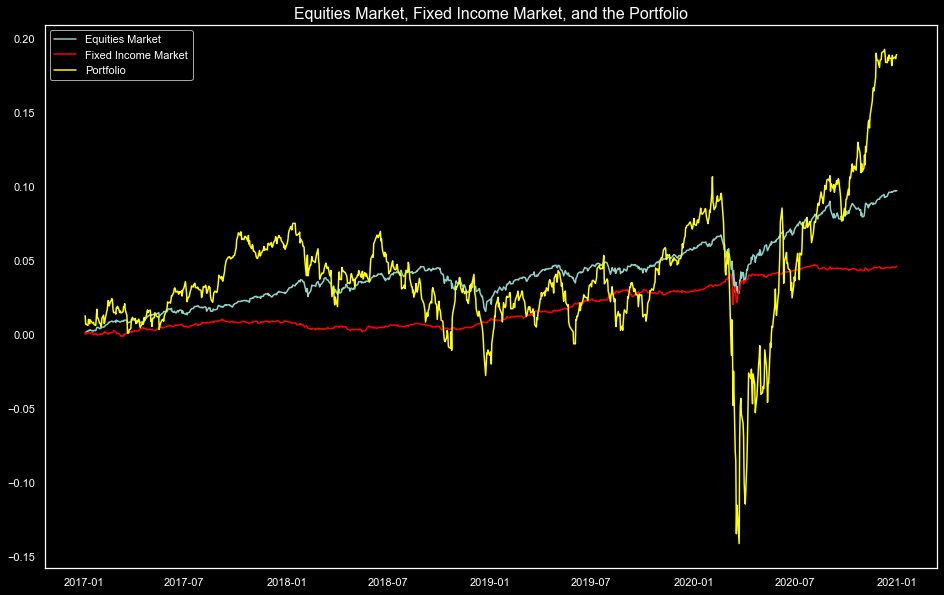

In [96]:
portfolio_plot(market=market['NASDAQ'], bonds=market['Vanguard Bonds'])

Let's tidy this up further by copying pasting our functions into the **PortfolioAnalysis1.py** file that we created earlier.

Now the really cool part.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import PortfolioAnalysis1 as pa1

In [3]:
tickers = pa1.get_tickers(4)
tickers

Please input ticker 1:  tsla
Please input ticker 2:  aapl
Please input ticker 3:  f
Please input ticker 4:  gm


['TSLA', 'AAPL', 'F', 'GM']

In [4]:
portfolio_returns = pa1.get_data(tickers)
portfolio_returns

,TSLA Returns,AAPL Returns,F Returns,GM Returns
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.011950,-0.000339,0.019390,0.015682
2017-01-05,-0.000277,0.001534,-0.013026,-0.005476
2017-01-06,0.002600,0.003347,-0.000335,-0.003194
2017-01-09,0.002579,0.002744,-0.004383,0.000161
...,...,...,...,...
2020-12-24,0.003732,0.001578,-0.006648,-0.005524
2020-12-28,0.000446,0.007206,0.001553,0.000516
2020-12-29,0.000532,-0.002729,-0.003626,-0.000580


In [5]:
index = '^IXIC'
bonds = 'BND'
equities, bonds = pa1.get_market(equities=index, bonds=bonds)
equities, bonds

(Date
 2017-01-03         NaN
 2017-01-04    0.001022
 2017-01-05    0.000232
 2017-01-06    0.000699
 2017-01-09    0.000226
                 ...   
 2020-12-24    0.000278
 2020-12-28    0.000779
 2020-12-29   -0.000404
 2020-12-30    0.000163
 2020-12-31    0.000150
 Name: Adj Close, Length: 1007, dtype: float64,
 Date
 2017-01-03         NaN
 2017-01-04    0.000174
 2017-01-05    0.001186
 2017-01-06   -0.000924
 2017-01-09    0.000579
                 ...   
 2020-12-24    0.000383
 2020-12-28   -0.000076
 2020-12-29    0.000076
 2020-12-30    0.000153
 2020-12-31    0.000305
 Name: Adj Close, Length: 1007, dtype: float64)

In [6]:
sharpe_ratio = pa1.sharpe(tickers, portfolio_returns, equities)
sharpe_ratio

,TSLA,AAPL,F,GM
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,1.285261,-0.276797,1.525905,2.014322
2017-01-05,-0.059874,0.264929,-1.101368,-0.784249
2017-01-06,0.223613,0.538902,-0.085901,-0.534894
2017-01-09,0.276770,0.512282,-0.382910,-0.008922
...,...,...,...,...
2020-12-24,0.406249,0.264483,-0.575378,-0.797277
2020-12-28,-0.039162,1.307743,0.064305,-0.036189
2020-12-29,0.110106,-0.473137,-0.267725,-0.024201


In [7]:
drawdowns = pa1.drawdown(tickers, portfolio_returns)
drawdowns

,TSLA Wealth,TSLA Peaks,TSLA Drawdowns,AAPL Wealth,AAPL Peaks,AAPL Drawdowns,F Wealth,F Peaks,F Drawdowns,GM Wealth,GM Peaks,GM Drawdowns
Date,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,1.011950,1.011950,0.000000,0.999661,0.999661,0.000000,1.019390,1.019390,0.000000,1.015682,1.015682,0.000000
2017-01-05,1.011669,1.011950,-0.000277,1.001195,1.001195,0.000000,1.006111,1.019390,-0.013026,1.010120,1.015682,-0.005476
2017-01-06,1.014299,1.014299,0.000000,1.004546,1.004546,0.000000,1.005774,1.019390,-0.013356,1.006894,1.015682,-0.008653
2017-01-09,1.016915,1.016915,0.000000,1.007302,1.007302,0.000000,1.001366,1.019390,-0.017681,1.007056,1.015682,-0.008493
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1.722601,1.735595,-0.007487,1.474098,1.478598,-0.003043,0.937010,1.044799,-0.103167,1.088121,1.120515,-0.028910
2020-12-28,1.723369,1.735595,-0.007044,1.484721,1.484721,0.000000,0.938465,1.044799,-0.101774,1.088682,1.120515,-0.028409
2020-12-29,1.724287,1.735595,-0.006516,1.480669,1.484721,-0.002729,0.935062,1.044799,-0.105031,1.088051,1.120515,-0.028972


In [8]:
summary = pa1.summary_statistics(portfolio_returns)
summary

,Mean,Median,Minimum,Maximum,Volatility,Observations,Skewness,Excess Kurtosis,Jarque-Bera,P-Value
TSLA Returns,0.000587,0.000378,-0.043781,0.041395,0.008502,1007,-0.083200,4.968610,1036.990820,0.0
AAPL Returns,0.000399,0.000335,-0.032564,0.027494,0.004915,1007,-0.335760,6.871610,2000.151990,0.0
F Returns,0.000003,0.000000,-0.067712,0.152190,0.012037,1007,1.701370,30.763780,40195.611670,0.0
GM Returns,0.000111,0.000246,-0.063165,0.063408,0.007278,1007,-0.244970,16.942130,12053.616590,0.0
Portfolio Average Returns,0.000275,0.000271,-0.048696,0.068301,0.006288,1007,0.161905,22.531549,21305.415185,0.0


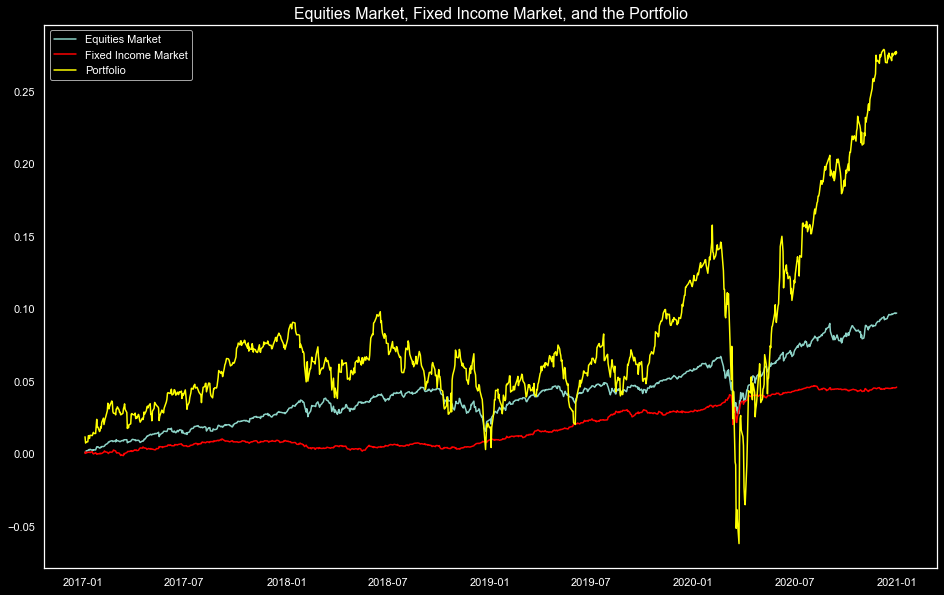

In [12]:
pa1.portfolio_plot(portfolio_returns, equities, bonds)

## That concludes our first part of our Portfolio Analysis.

The next section will focus more on modelling rather than analysis; Monte-Carlo Simulations, Value-at-Risks, Capital Asset Pricing Model, etc.